# EDA - univariate Analysis

---


In [93]:
DATA_PATH = r'..\data\processed\03-final_data.pkl'
OUTPUT_DATA_PATH = r'..\data\processed\04-final_data_v2.pkl'

In [94]:
# Functions

## Importing


In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# Set the maximum number of rows and columns to display
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [96]:
df = pd.read_pickle(DATA_PATH)

In [97]:
df.head(1)

,Key_languages,Databases,Platforms,Web_frames,Country,EdLevel,experanse_years,learning_years,Total_years,DevType
0,"[GDScript, Bash/Shell (all shells), Rust, Java...",[Supabase],"[Amazon Web Services (AWS), Netlify, Vercel]","[Next.js, React, Remix, Vue.js]",United States of America,Bachelor's,9.0,9.0,18.0,Executive


### Country:

1. **What are the top 5 countries with the highest number of respondents?**


Text(0.5, 1.0, 'top 5 countries with the highest number of respondents')

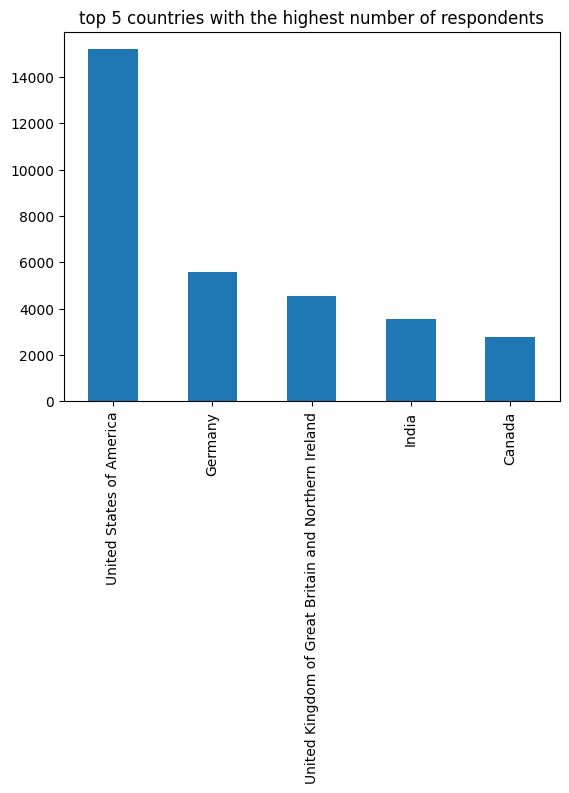

In [98]:
df['Country'].value_counts().head(5).plot(kind='bar')
plt.title('top 5 countries with the highest number of respondents')

2. **What is the distribution of respondents across different countries?**


In [99]:
df['Country'].value_counts()

United States of America                                15196
Germany                                                  5573
United Kingdom of Great Britain and Northern Ireland     4547
India                                                    3569
Canada                                                   2786
                                                        ...  
Democratic People's Republic of Korea                       1
Grenada                                                     1
Gabon                                                       1
Guinea-Bissau                                               1
Saint Vincent and the Grenadines                            1
Name: Country, Length: 180, dtype: int64

<Axes: >

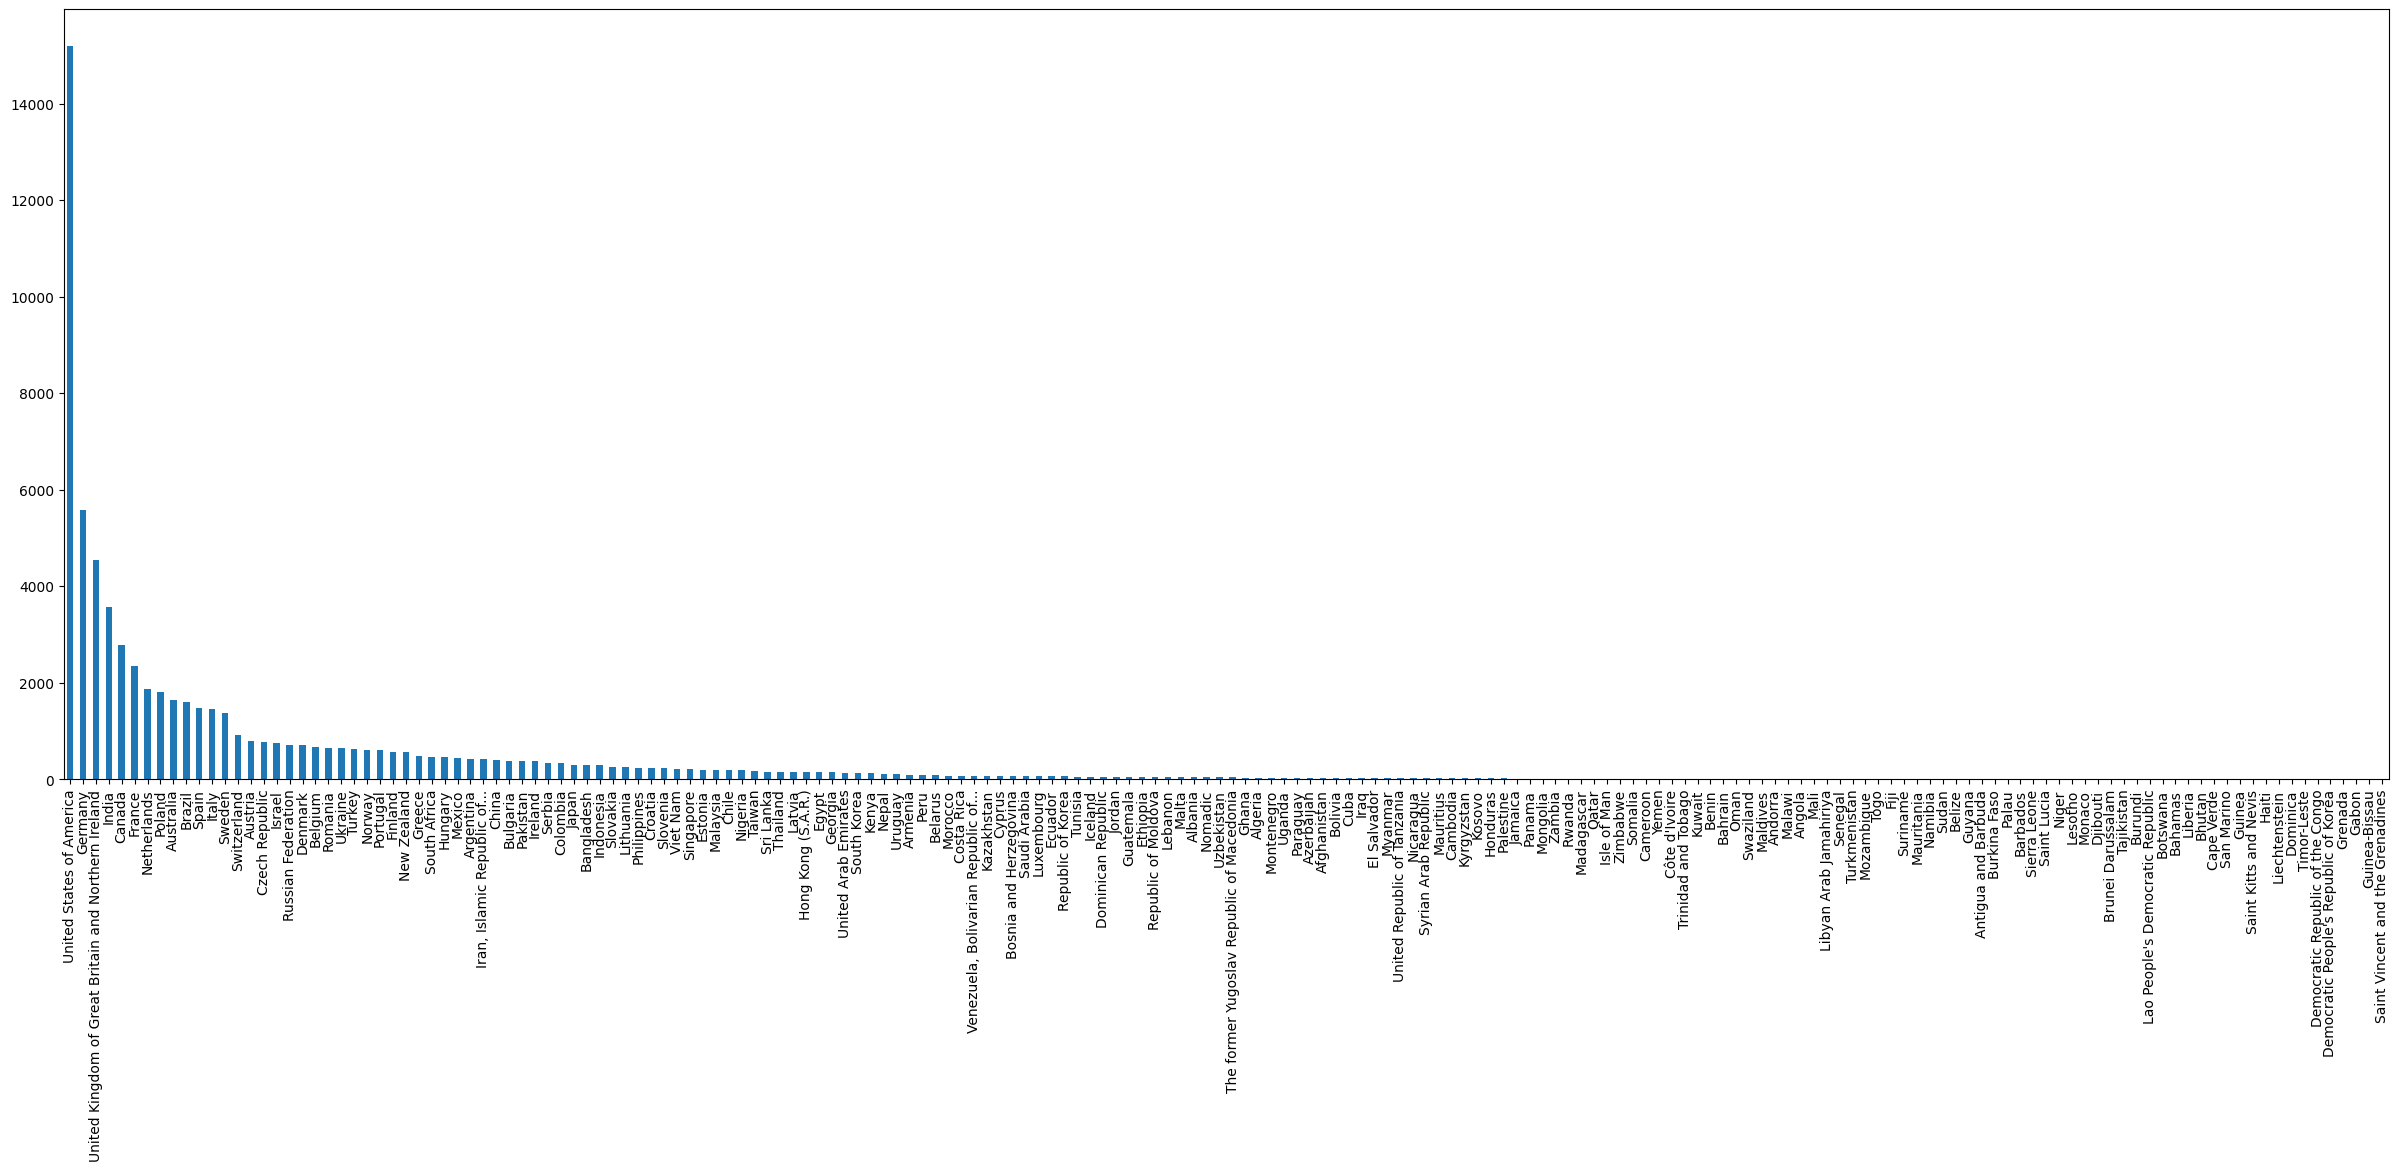

In [100]:
df['Country'].value_counts().plot(kind='bar', figsize=(30, 10))

It's very widely distributed (180 country) and it's not balanced either, so i think this feature is not useful in modeling part


In [101]:
df = df.drop('Country', axis=1)

### EdLevel (Education Level):

3. **What are the most common education levels among respondents?**


In [102]:
df['EdLevel'].value_counts()

Bachelor's                 30989
Master's                   18400
Some College/University     7777
Professional                3461
Secondary School            3216
Associate                   2129
Other                        771
Primary/Elementary           378
Name: EdLevel, dtype: int64

<Axes: >

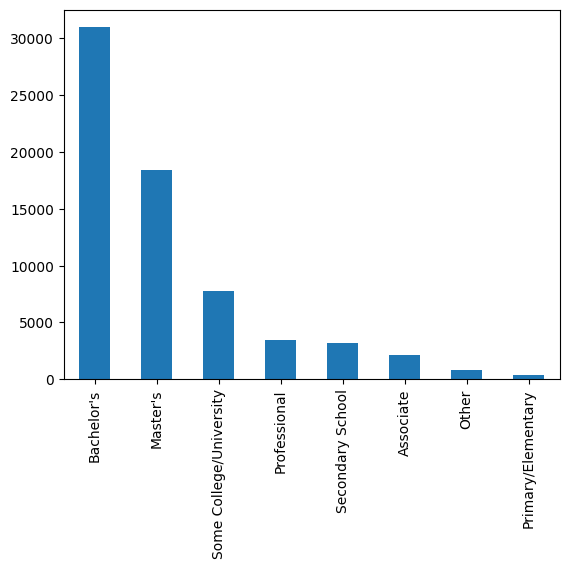

In [103]:
df['EdLevel'].value_counts().plot(kind='bar')

4. **What percentage of respondents have completed a Bachelor's degree?**


<Axes: ylabel='EdLevel'>

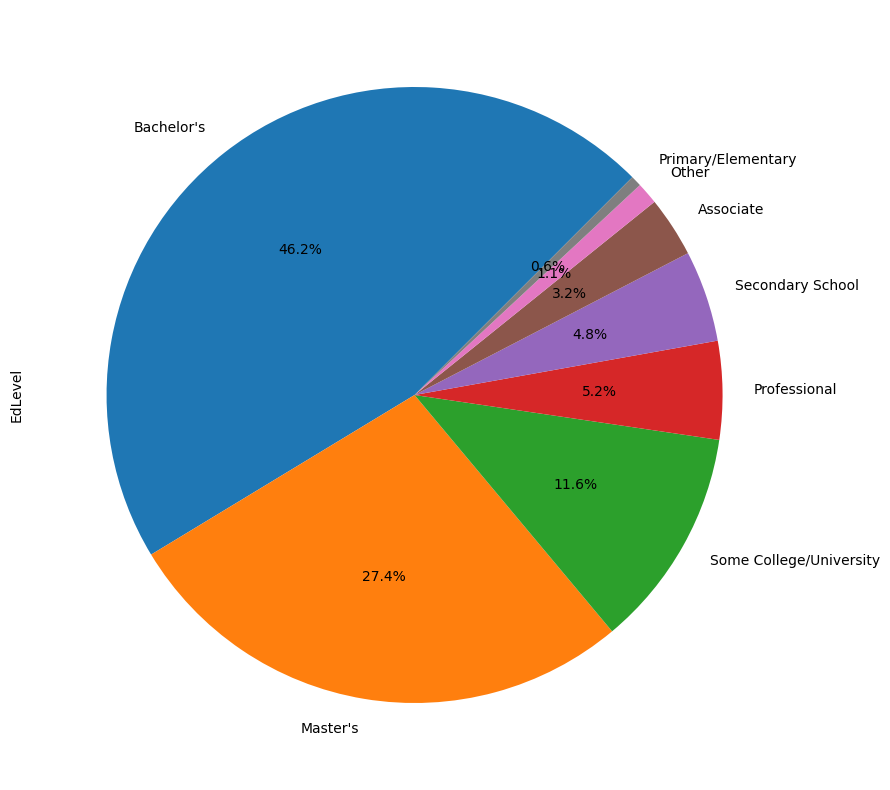

In [104]:
df['EdLevel'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                  startangle=45, figsize=(15, 10))

about 46.2%


### experanse_years (Experience Years):

5. **What is the average number of years of experience among respondents?**


In [105]:
df['experanse_years'].describe()

count    67121.000000
mean        11.108178
std          8.884209
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         51.000000
Name: experanse_years, dtype: float64

about 9 years


6. **What is the distribution of experience years among respondents?**


<Axes: xlabel='experanse_years', ylabel='Count'>

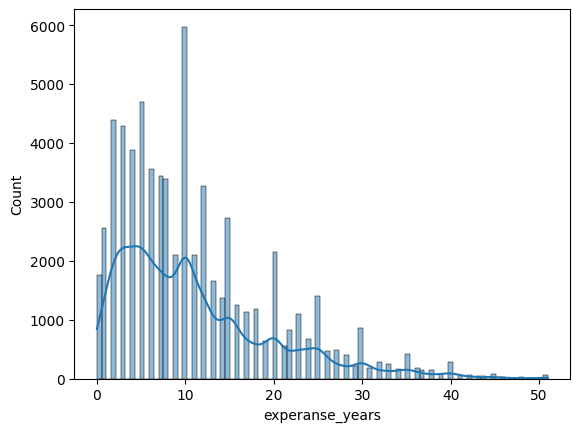

In [106]:
sns.histplot(df['experanse_years'], kde=True)

it's a right-skew distribution but it makes sense because if the years of experience increase, the number of people who have them will decrease


## **I think the learning years and total years not useful for our case so we will drop them**


In [107]:
# df.head()

In [108]:
df = df.drop(['learning_years', 'Total_years'], axis=1)

### DevType (Developer Type):

7. **What are the top 5 most common developer types among respondents?**


8. **How many respondents identify as "Back-end Developer," "Front-end Developer," or "Full-stack Developer"?**


In [109]:
df['DevType'].value_counts().head()

Full-stack Developer            23198
Back-end Developer              12679
Front-end Developer              4337
Desktop/Enterprise Developer     3615
Other                            2411
Name: DevType, dtype: int64

### we should drop devtype == other because it is not useful for us


In [110]:
df = df[~(df['DevType'] == 'Other')]

<Axes: >

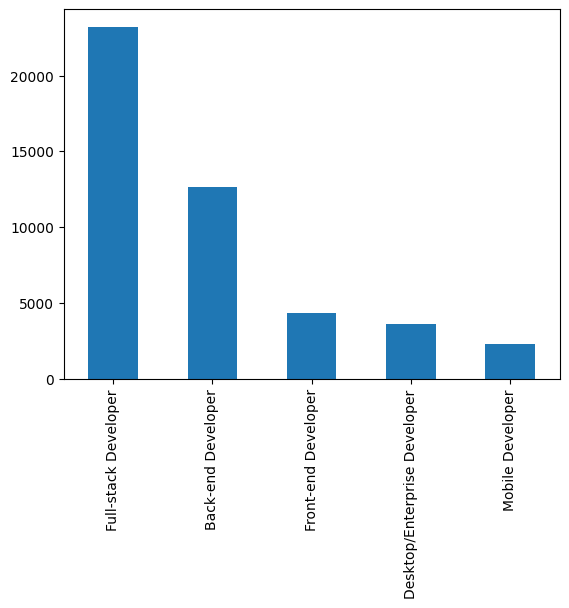

In [111]:
df['DevType'].value_counts().head().plot(kind='bar')

In [112]:
df['DevType'].value_counts()

Full-stack Developer             23198
Back-end Developer               12679
Front-end Developer               4337
Desktop/Enterprise Developer      3615
Mobile Developer                  2302
Engineering Manager               1974
Embedded Developer                1713
Data Scientist/ML Specialist      1377
Executive                         1288
DevOps Specialist                 1276
R&D Developer                     1255
Data Engineer                     1145
Academic Researcher               1051
Cloud Infrastructure Engineer      955
Game/Graphics Developer            719
Data/Business Analyst              670
System Administrator               571
QA/Test Developer                  508
Project Manager                    497
Product Manager                    415
Site Reliability Engineer          402
Security Professional              395
Educator                           325
Scientist                          307
Developer Experience               298
Blockchain Developer     

<Axes: >

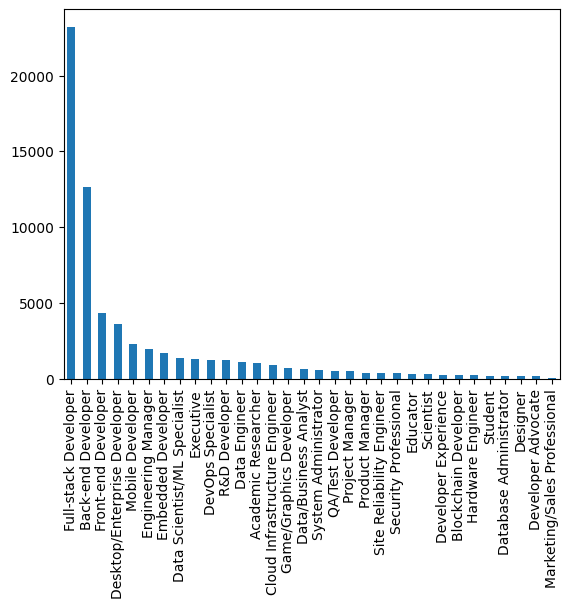

In [113]:
df['DevType'].value_counts().plot(kind='bar')

In [114]:
df.head(1)

,Key_languages,Databases,Platforms,Web_frames,EdLevel,experanse_years,DevType
0,"[GDScript, Bash/Shell (all shells), Rust, Java...",[Supabase],"[Amazon Web Services (AWS), Netlify, Vercel]","[Next.js, React, Remix, Vue.js]",Bachelor's,9.0,Executive


In [115]:
df = df[~(df['DevType'] == 'Student')]

**Key_languages:**


What are the most commonly used programming languages combination for among developers in the dataset?


In [116]:
df['Key_languages'].value_counts()

[TypeScript, JavaScript, HTML/CSS]                                                    632
[JavaScript, HTML/CSS, SQL, TypeScript, C#]                                           317
[Python]                                                                              279
[JavaScript, TypeScript]                                                              243
[C#]                                                                                  242
                                                                                     ... 
[Rust, R, Python, C++, C#]                                                              1
[Bash/Shell (all shells), C, PowerShell, Objective-C, Swift, C++, C#]                   1
[Nim, Go, JavaScript, Elixir, Python, Julia, Bash/Shell (all shells)]                   1
[C#, JavaScript, TypeScript, Kotlin, Java, SQL, HTML/CSS, Bash/Shell (all shells)]      1
[C, Go, JavaScript, Java, HTML/CSS, SQL, TypeScript, Bash/Shell (all shells)]           1
Name: Key_

**Databases:**

- Which databases combination are most commonly used by developers in the dataset?


In [117]:
df['Databases'].value_counts()

[Don't have]                                                                                                8309
[PostgreSQL]                                                                                                3458
[Microsoft SQL Server]                                                                                      2921
[MySQL]                                                                                                     1951
[SQLite]                                                                                                    1413
                                                                                                            ... 
[BigQuery, Cassandra, Clickhouse, MariaDB, MySQL, PostgreSQL, Redis, SQLite]                                   1
[Elasticsearch, Firebase Realtime Database, MySQL, Oracle, PostgreSQL]                                         1
[InfluxDB, MariaDB, Microsoft SQL Server, MySQL, PostgreSQL, Redis, Solr, SQLite]               

**Platforms:**

- What are the popular cloud platforms used by developers?


In [118]:
df['Platforms'].value_counts()

[Don't have]                                                                                                                 14922
[Amazon Web Services (AWS)]                                                                                                   8543
[Microsoft Azure]                                                                                                             5252
[Amazon Web Services (AWS), Microsoft Azure]                                                                                  1948
[Google Cloud]                                                                                                                1818
                                                                                                                             ...  
[Amazon Web Services (AWS), Cloudflare, Digital Ocean, Fly.io, Google Cloud, Heroku, Linode, now Akamai, Netlify, Render]        1
[Google Cloud, Microsoft Azure, OpenShift, OpenStack, VMware]                      

**Web_frames:**

- Are there common combinations of web frameworks used together?


In [119]:
df['Web_frames'].value_counts()

[Don't have]                                                                                      13851
[React]                                                                                            1562
[Spring Boot]                                                                                      1248
[Node.js, React]                                                                                    847
[Node.js]                                                                                           836
                                                                                                  ...  
[Angular, Django, Express, FastAPI, Fastify, Flask, Gatsby, jQuery, Node.js, React, WordPress]        1
[ASP.NET, Blazor, Spring Boot]                                                                        1
[ASP.NET, Django, jQuery, Node.js, React, Ruby on Rails, Spring Boot, Vue.js]                         1
[Drupal, React, Vue.js, WordPress]                              

---


In [120]:
df.to_pickle(OUTPUT_DATA_PATH)

# EDA - Univariate Analysis Conclusion

## Country:

1. **Top 5 Countries:**

   - The top 5 countries with the highest number of respondents are the United States, India, Germany, United Kingdom, and Canada. These countries show a concentration of developers in the dataset.

2. **Distribution Across Countries:**

   - The distribution of respondents spans across 180 countries, indicating a wide representation. However, the uneven distribution and the presence of numerous countries might limit the utility of this feature in the modeling phase.

   **Conclusion:** Due to the extensive and unbalanced distribution, the 'Country' feature may not be highly informative for modeling.

## EdLevel (Education Level):

3. **Common Education Levels:**

   - The most common education levels among respondents include Bachelor's, Master's, and Some College/University degrees. This suggests a diverse educational background among participants.

4. **Percentage with Bachelor's Degree:**

   - Approximately 46.2% of respondents have completed a Bachelor's degree, indicating a significant portion of the developer population holds at least a Bachelor's degree.

   **Conclusion:** The 'EdLevel' feature provides insights into the educational background of respondents, with a significant proportion holding Bachelor's degrees.

## experanse_years (Experience Years):

5. **Average Experience Years:**

   - The average number of years of experience among respondents is approximately 9 years, suggesting a relatively experienced developer population.

6. **Distribution of Experience Years:**

   - The distribution of experience years is right-skewed, aligning with expectations in the professional world. It reflects a higher concentration of developers with fewer years of experience.

   **Conclusion:** The 'experanse_years' feature provides insights into the distribution of experience among respondents, with a right-skewed pattern as expected in the professional world.

## DevType (Developer Type):

7. **Top 5 Developer Types:**

   - The top 5 most common developer types among respondents include Back-end Developer, Full-stack Developer, Front-end Developer, Mobile Developer, and DevOps Specialist.

8. **Back-end, Front-end, Full-stack Developers:**

   - The majority of respondents identify as Back-end, Front-end, or Full-stack Developers, indicating a prevalence of these roles in the developer community.

   **Conclusion:** The 'DevType' feature provides insights into the variety of developer roles, with a focus on the most common types relevant to the study.

## Key_languages, Databases, Platforms, Web_frames:

9. **Key Languages:**

   - The most commonly used programming language combinations among developers are diverse, reflecting the polyglot nature of modern development.

10. **Databases:**

    - The combinations of databases most commonly used by developers vary, showcasing the diversity in database preferences.

11. **Platforms:**

    - The popular cloud platforms used by developers differ, indicating a distributed adoption of cloud services across various providers.

12. **Web Frameworks:**

    - Common combinations of web frameworks used together are diverse, showcasing a variety of technology stacks employed by developers.

    **Conclusion:** The exploration of 'Key_languages,' 'Databases,' 'Platforms,' and 'Web_frames' provides insights into the technology stack preferences and combinations among developers.

## Note:

- Learning years and total years were deemed not useful for the analysis and were dropped from the dataset.
- The 'DevType' category labeled as 'Other' was removed from the analysis for a more focused exploration of specific developer types.
